# Regression with an Insurance Dataset

### Necessary imports

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_data_path = '/content/drive/MyDrive/playground-series-s4e12/train.csv'

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import train data
df = pd.read_csv(train_data_path)
df.shape

(1200000, 21)

## I - EDA (Exploratory Data Analysis)

#### 1- Shape analysis

In [5]:
# Number of rows and columns
df1 = df.copy()
df1.shape

(1200000, 21)

In [6]:
pd.set_option('display.max_column',21)
df1.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [7]:
df1.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [8]:
df1.dtypes.value_counts()

,count
object,11
float64,9
int64,1


In [9]:
# delete col:id
df1.drop(columns='id',inplace=True)

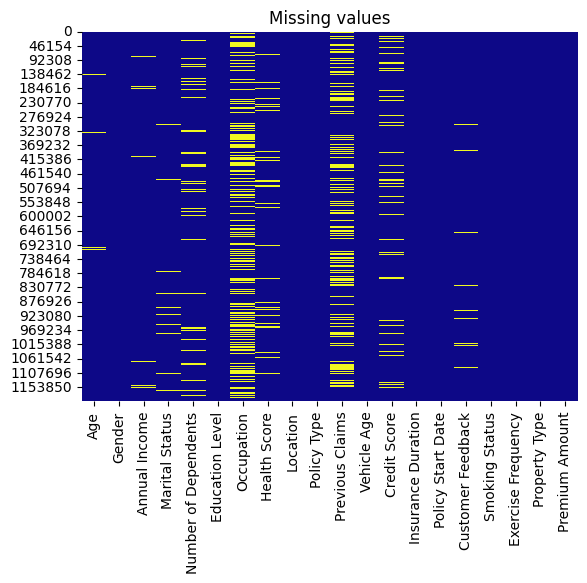

In [10]:
plt.figure()
plt.title('Missing values')
sns.heatmap(data=df1.isna(),cbar=False,cmap='plasma')
plt.show()

In [11]:
missing_rate = (df1.isna().sum(axis=0)/df1.shape[0]).sort_values(ascending=True)
missing_rate_percentage = (missing_rate * 100).round(2).astype(str) + '%'
missing_rate_percentage

,0
Policy Type,0.0%
Exercise Frequency,0.0%
Smoking Status,0.0%
Policy Start Date,0.0%
Property Type,0.0%
Location,0.0%
Premium Amount,0.0%
Education Level,0.0%
Gender,0.0%
Insurance Duration,0.0%


#### 2 - Background analysis

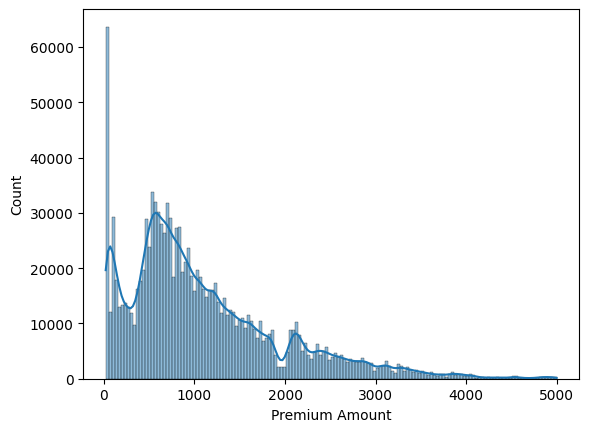

In [12]:
# Target visualisation
plt.figure()
sns.histplot(data=df1,x='Premium Amount',kde=True,bins=150)
plt.show()

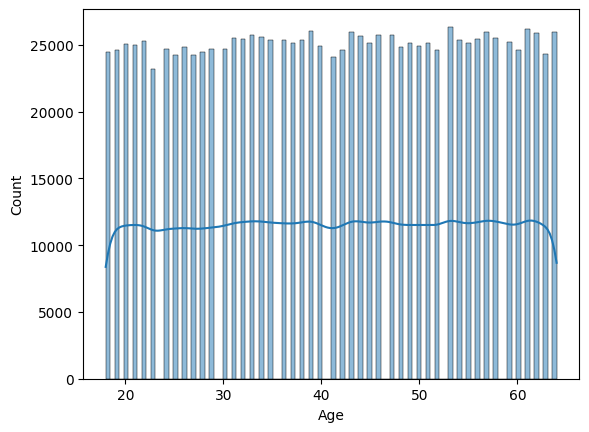

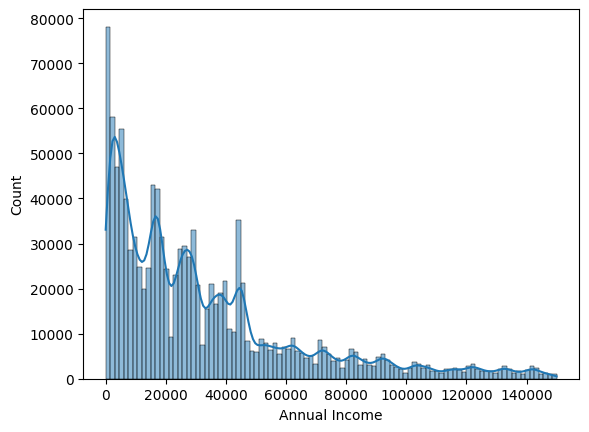

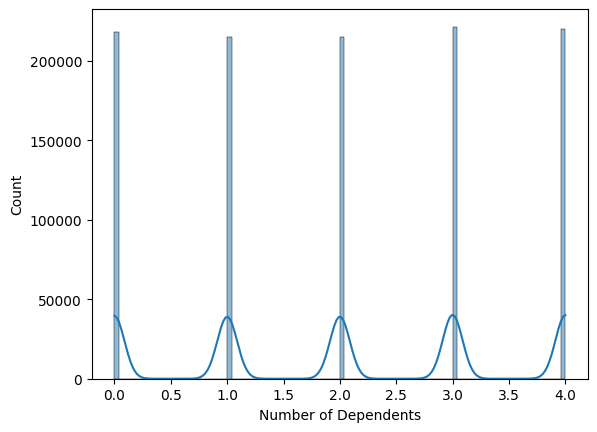

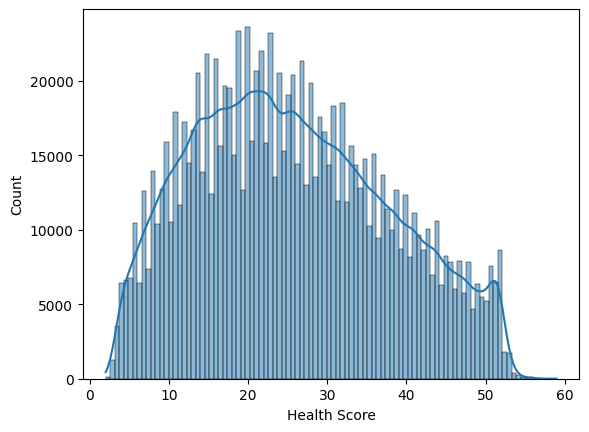

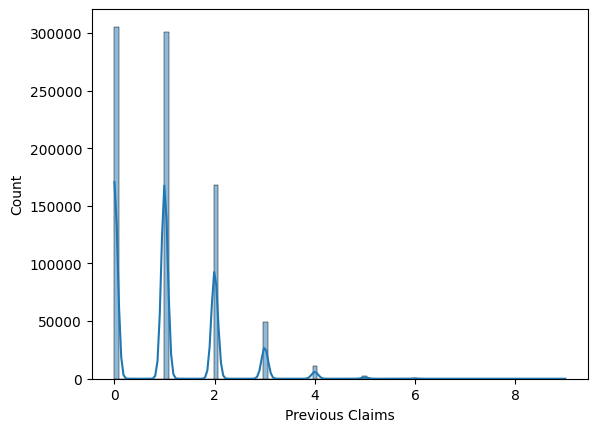

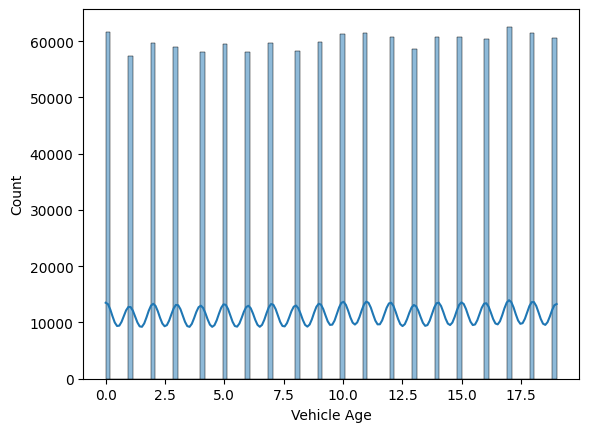

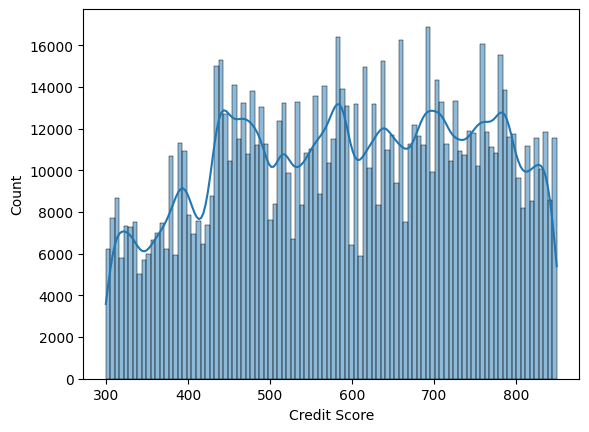

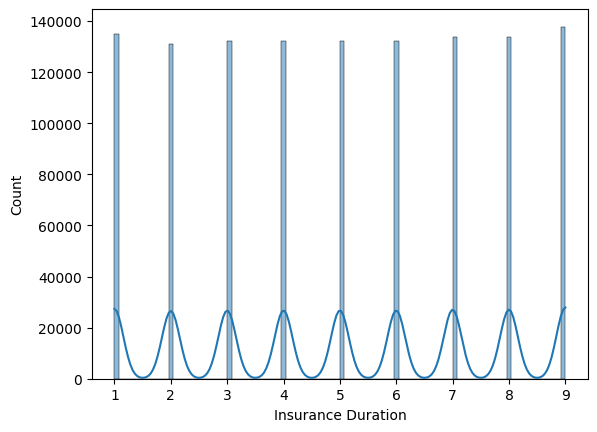

In [13]:
# Quantitative variables
df1_numerical = df1.select_dtypes(include='float64')
for col in df1_numerical.iloc[:,:-1]:
    plt.figure()
    sns.histplot(data=df1_numerical,x=col,kde=True,bins=100)
    plt.show()

In [14]:
# Qualitative variables
df1_categorical = df1.select_dtypes(include='object')
df1_categorical
for col in df1_categorical:
    print(f"{col :-<50} {df1_categorical[col].unique()}")

Gender-------------------------------------------- ['Female' 'Male']
Marital Status------------------------------------ ['Married' 'Divorced' 'Single' nan]
Education Level----------------------------------- ["Bachelor's" "Master's" 'High School' 'PhD']
Occupation---------------------------------------- ['Self-Employed' nan 'Employed' 'Unemployed']
Location------------------------------------------ ['Urban' 'Rural' 'Suburban']
Policy Type--------------------------------------- ['Premium' 'Comprehensive' 'Basic']
Policy Start Date--------------------------------- ['2023-12-23 15:21:39.134960' '2023-06-12 15:21:39.111551'
 '2023-09-30 15:21:39.221386' ... '2021-04-28 15:21:39.129190'
 '2019-11-14 15:21:39.201446' '2020-10-19 15:21:39.118178']
Customer Feedback--------------------------------- ['Poor' 'Average' 'Good' nan]
Smoking Status------------------------------------ ['No' 'Yes']
Exercise Frequency-------------------------------- ['Weekly' 'Monthly' 'Daily' 'Rarely']
Property Type---

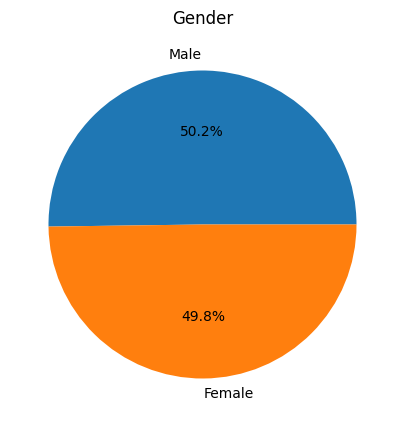

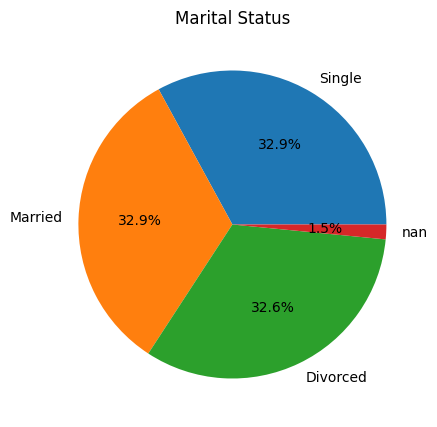

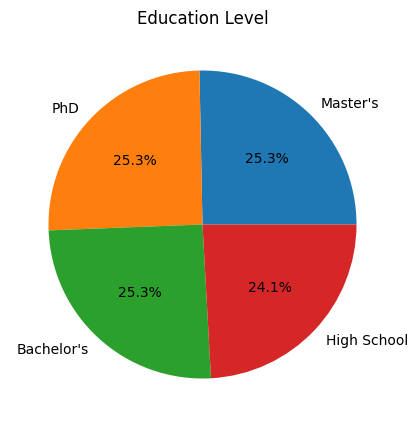

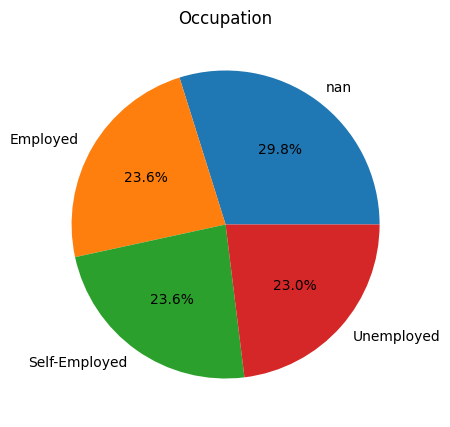

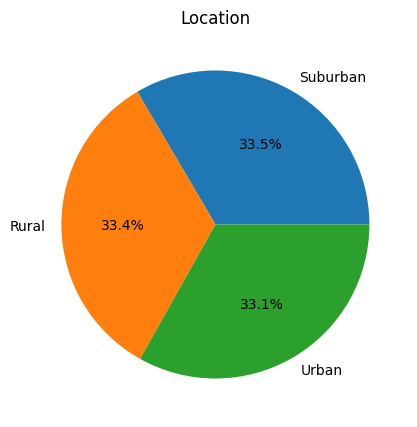

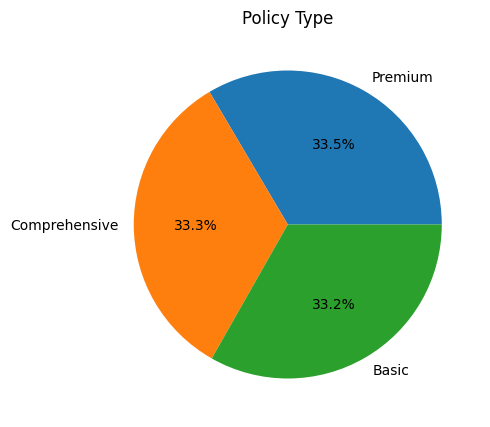

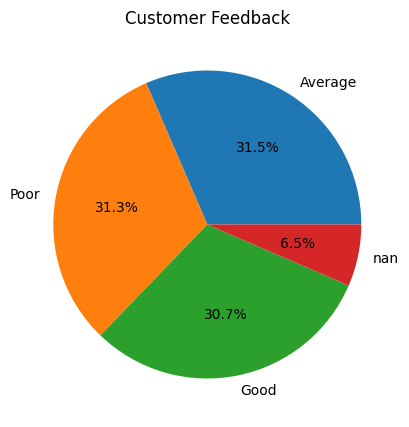

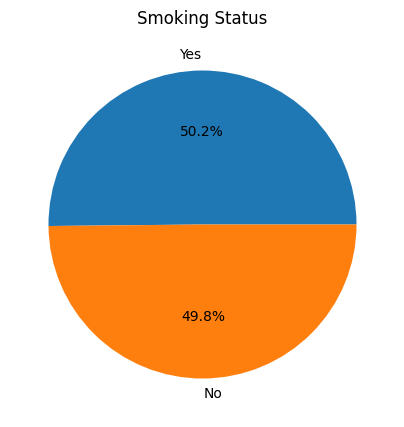

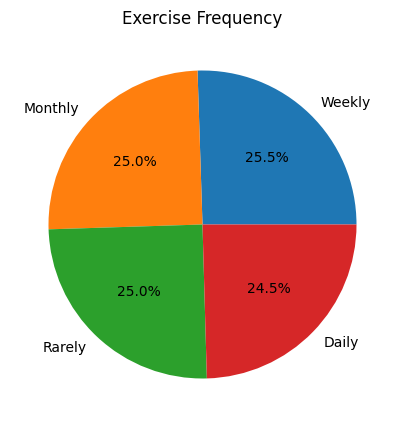

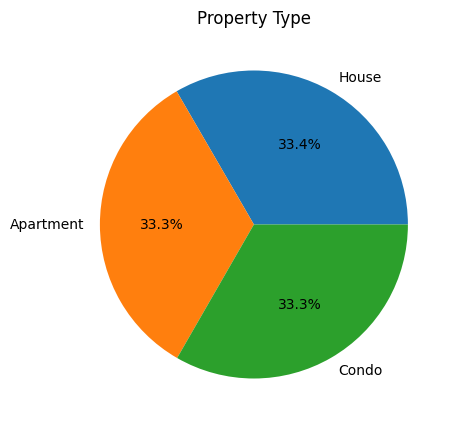

In [15]:
for col in df1_categorical.drop(columns='Policy Start Date'):
    plt.figure(figsize=(5,5))
    plt.title(col)
    df1_categorical[col].value_counts(dropna=False).plot.pie(autopct='%1.1f%%',startangle=0)
    plt.ylabel('')
    plt.show()

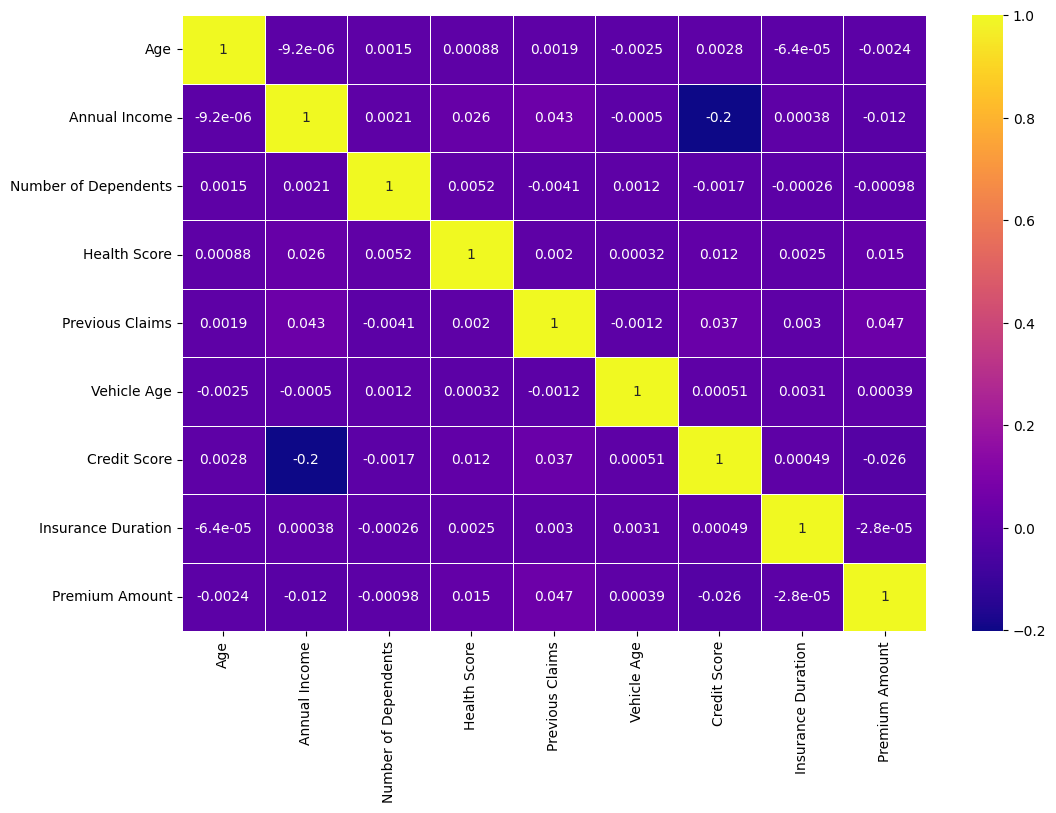

In [16]:
#Visualising variable-target relationships
#variable numerical/variable numerical and target
plt.figure(figsize=(12,8))
sns.heatmap(data=df1_numerical.corr(),annot=True,cmap='plasma',linewidths=0.5)
plt.show()

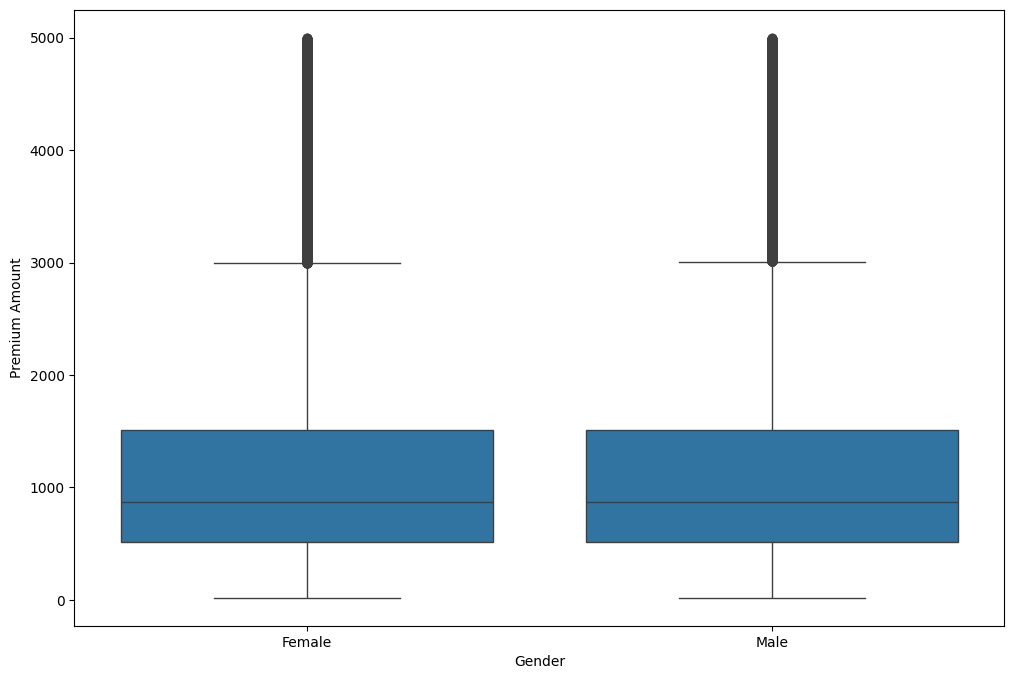

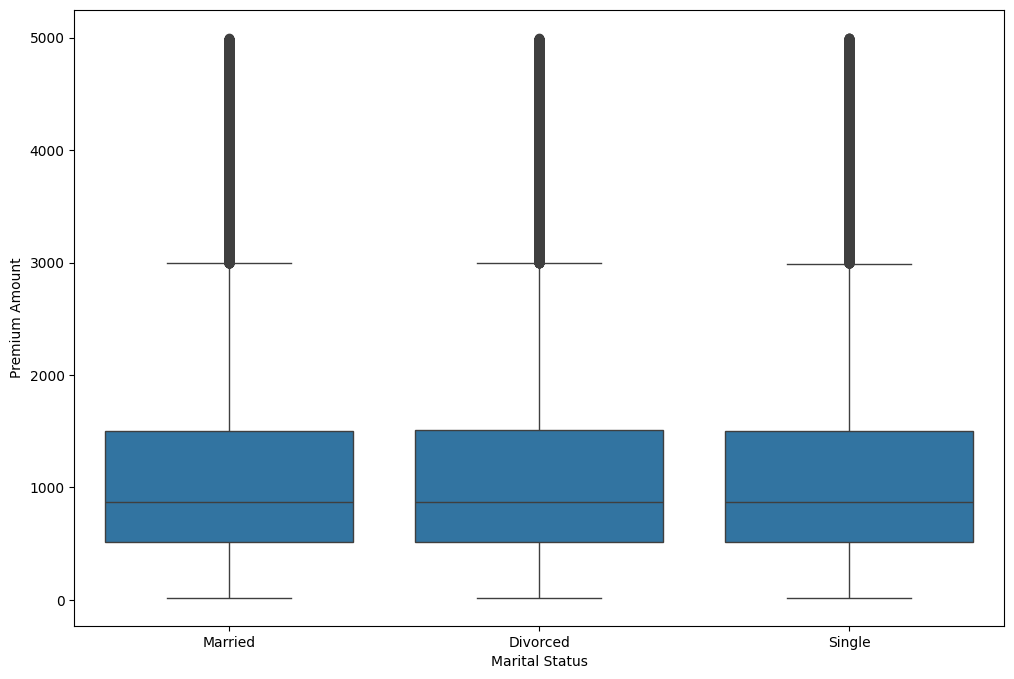

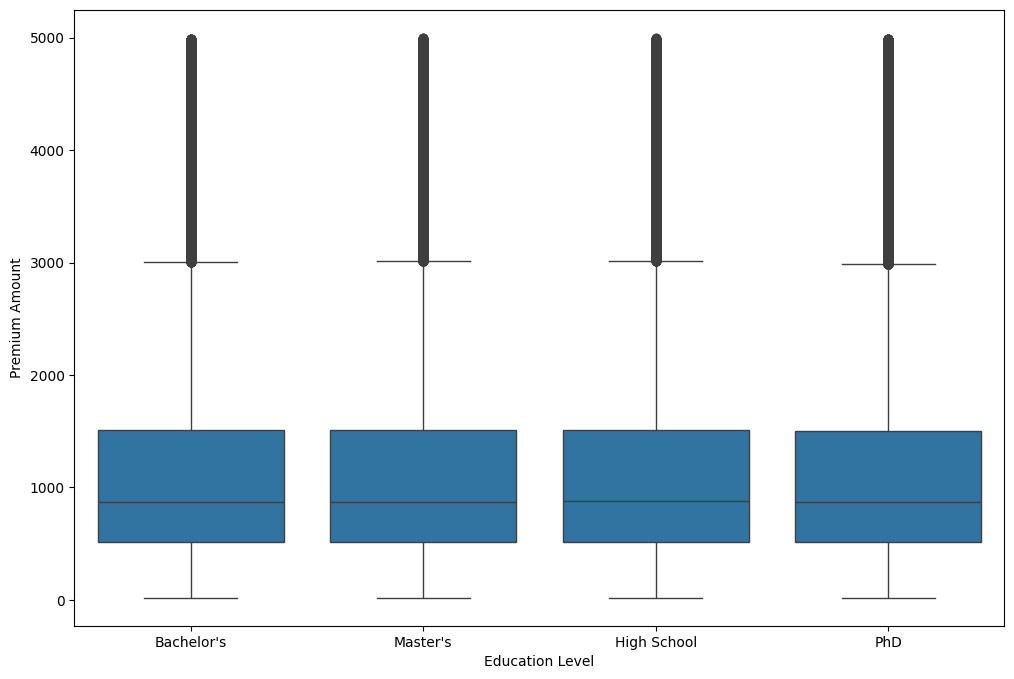

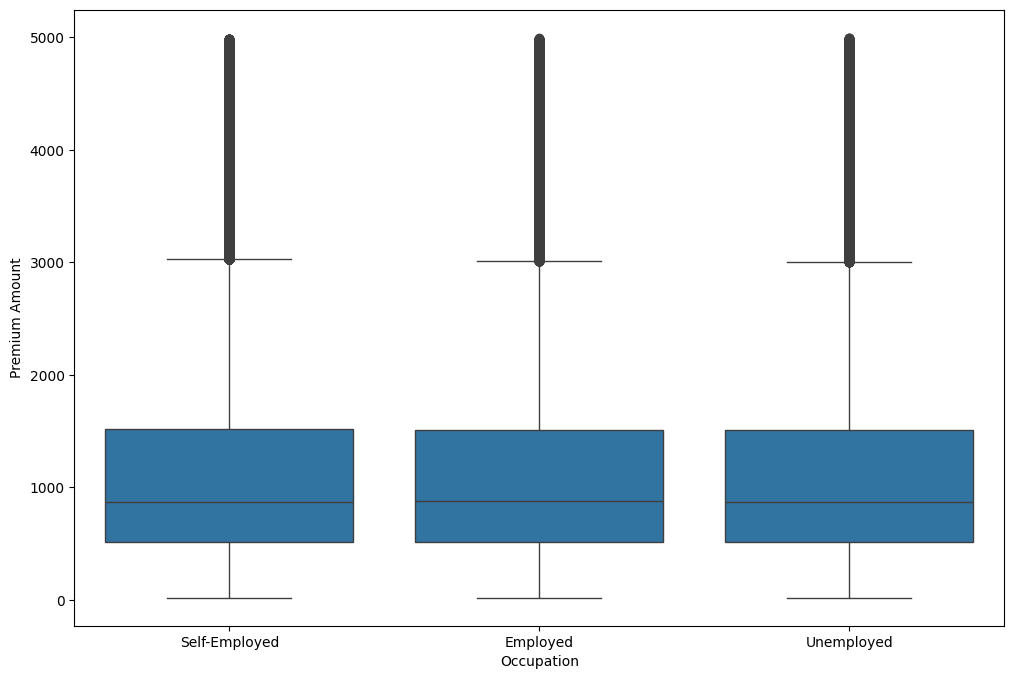

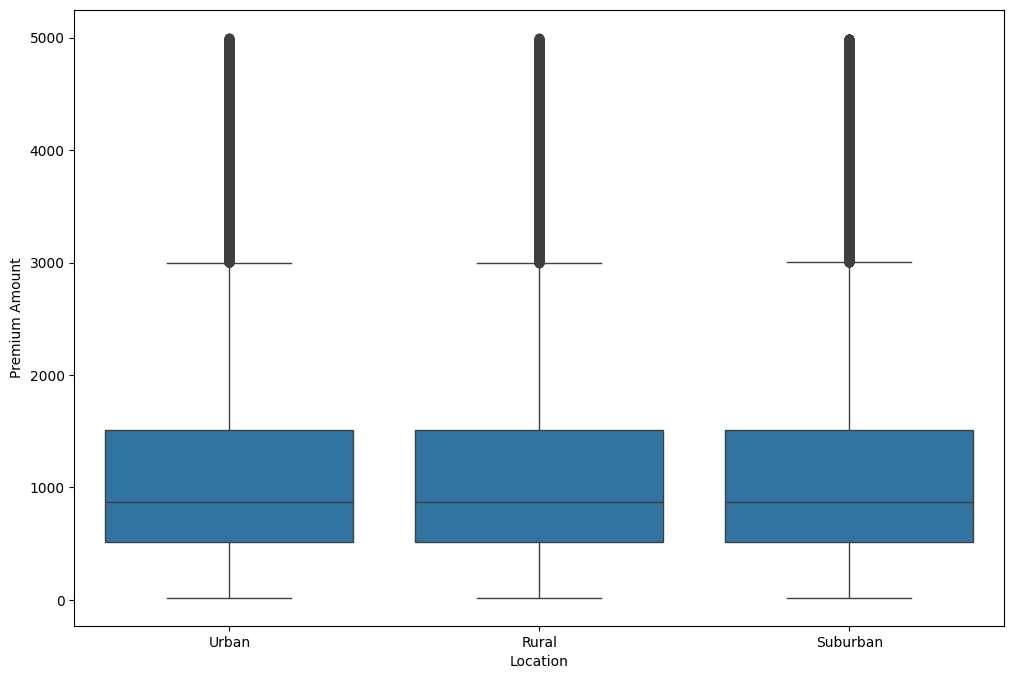

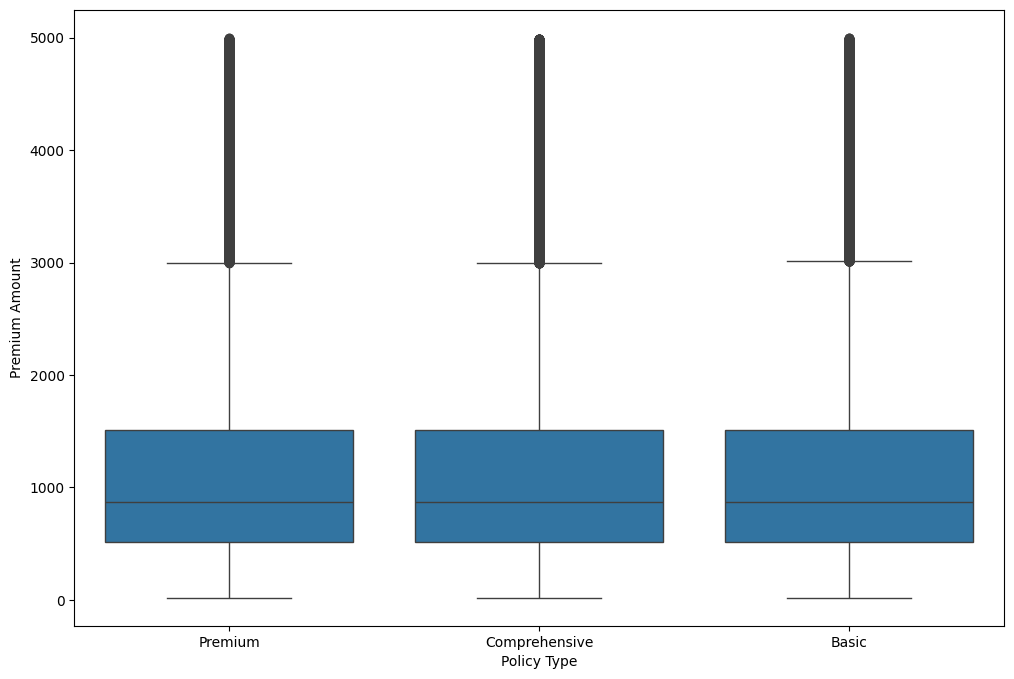

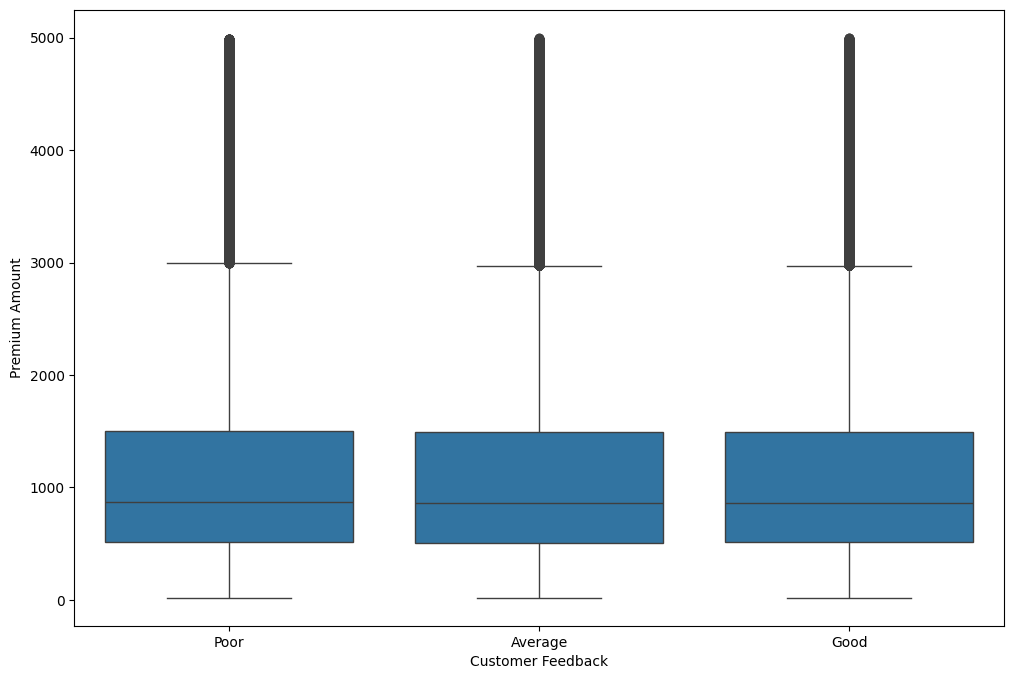

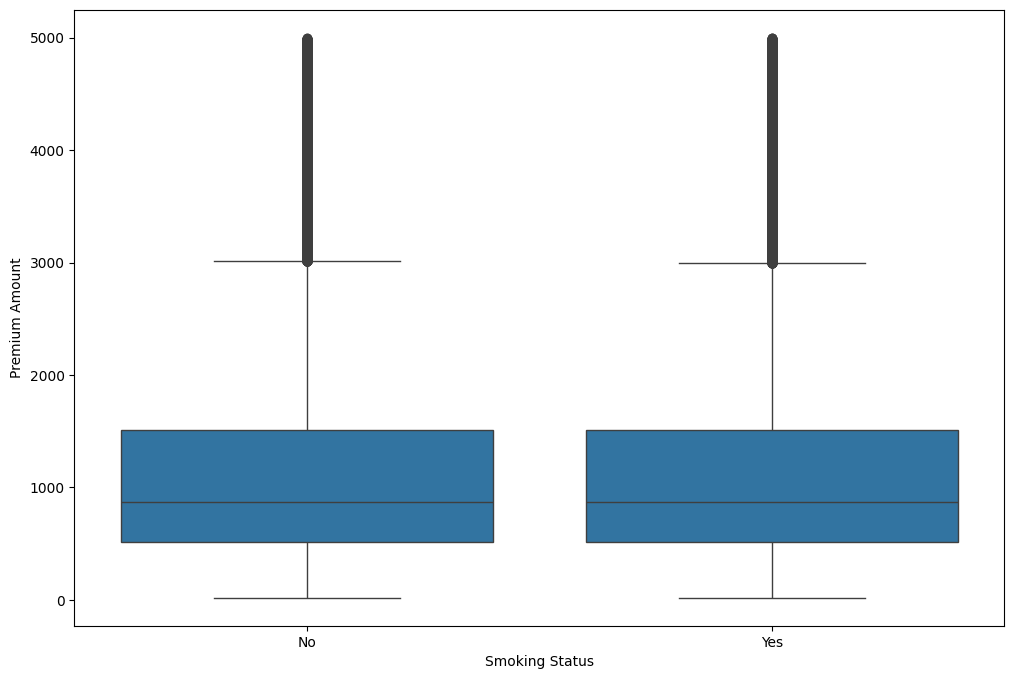

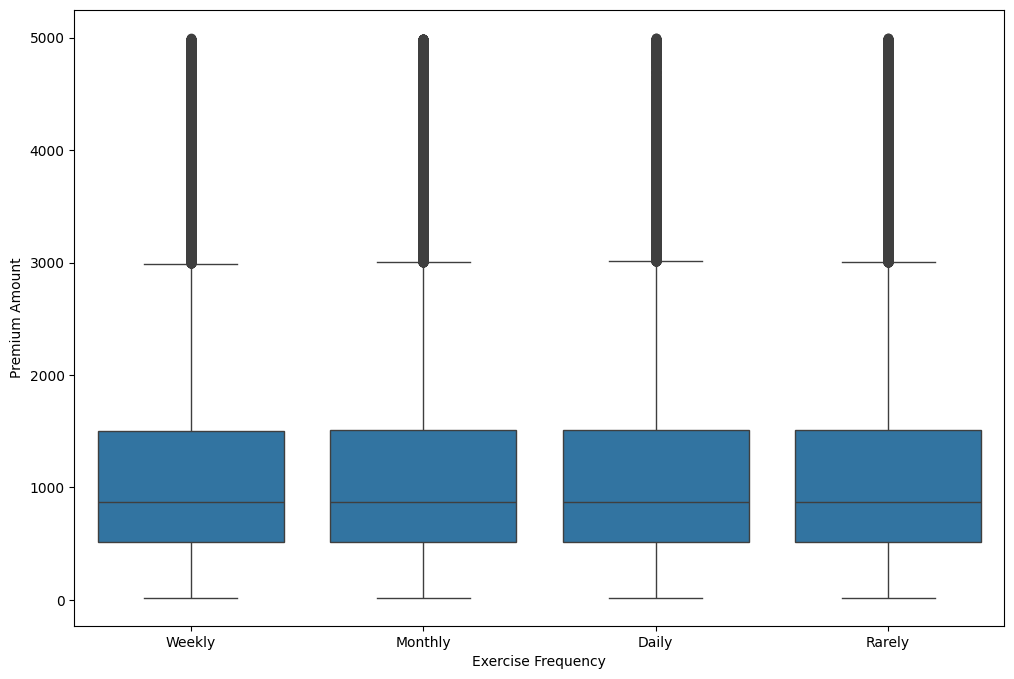

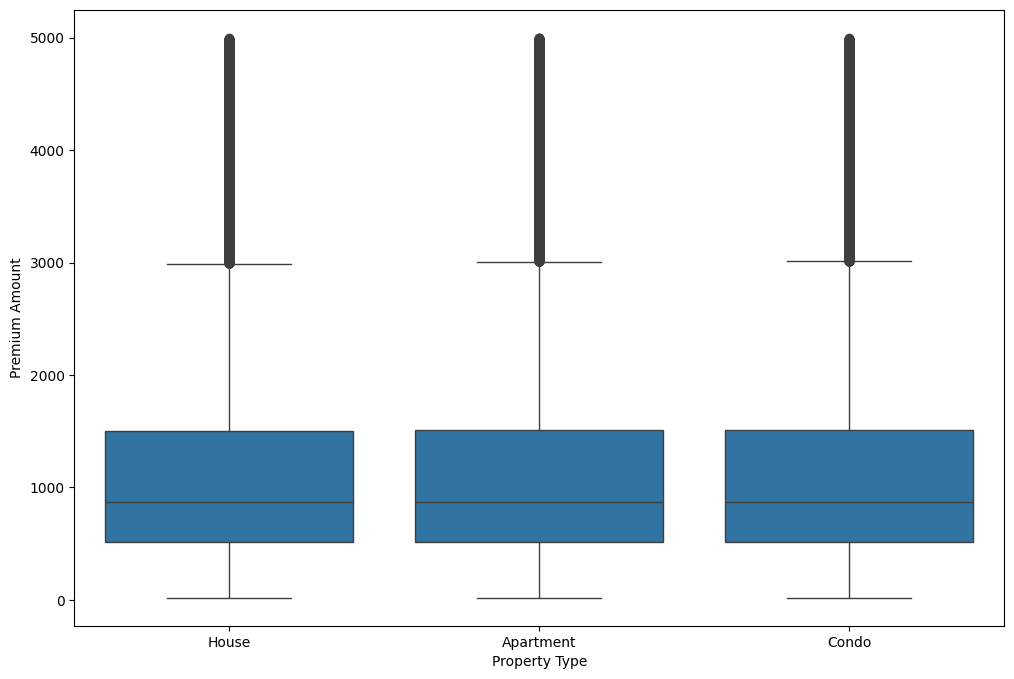

In [17]:
#categorical variable/target
for col in df1_categorical.drop(columns='Policy Start Date'):
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df1,x=col,y='Premium Amount')
    plt.show()

#### 3 - Detailed analysis

In [18]:
#Categorical variable/categorical variable
from scipy.stats import chi2_contingency

# Store significant combinations
cols = list(df1_categorical.drop(columns='Policy Start Date').columns)
significant_pairs = []

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        col, col2 = cols[i], cols[j]
        crosstab = pd.crosstab(df1[col], df1[col2])
        chi2, p, dof, expected = chi2_contingency(crosstab)
        if p < 0.05:
            significant_pairs.append((f"{col} as a significative correlation with {col2}"))

for pair in significant_pairs:
    print(pair)

Gender as a significative correlation with Marital Status
Gender as a significative correlation with Smoking Status
Marital Status as a significative correlation with Occupation
Marital Status as a significative correlation with Customer Feedback
Marital Status as a significative correlation with Property Type
Education Level as a significative correlation with Location
Education Level as a significative correlation with Policy Type
Education Level as a significative correlation with Exercise Frequency
Education Level as a significative correlation with Property Type
Occupation as a significative correlation with Property Type
Location as a significative correlation with Customer Feedback
Policy Type as a significative correlation with Exercise Frequency
Customer Feedback as a significative correlation with Exercise Frequency
Customer Feedback as a significative correlation with Property Type


In [19]:
#Numerical variable/categorical variable
import scipy.stats as stats
for col in df1_numerical.iloc[:,:-1]:
  for col2 in df1_categorical.drop(columns='Policy Start Date'):
    # plt.figure(figsize=(12,8))
    # sns.boxplot(data=df1,x=col,y=col2)
    # plt.show()
    #ANOVA test
    categories = df1[col2].unique()
    groups = [df1[df1[col2] == cat][col] for cat in categories]
    groups = [group.dropna() for group in groups]  # Supprimer les NaN des groupes
    if all(len(group) > 0 for group in groups):  # Vérifier que tous les groupes ont des données
        anova_result = stats.f_oneway(*groups)
        if anova_result.pvalue < 0.05: #threshold
          print(f'{col} could have an impact on {col2}')

Age could have an impact on Location
Annual Income could have an impact on Education Level
Annual Income could have an impact on Exercise Frequency
Number of Dependents could have an impact on Exercise Frequency
Number of Dependents could have an impact on Property Type
Health Score could have an impact on Gender
Health Score could have an impact on Education Level
Health Score could have an impact on Location
Health Score could have an impact on Policy Type
Health Score could have an impact on Smoking Status
Health Score could have an impact on Property Type
Previous Claims could have an impact on Policy Type
Vehicle Age could have an impact on Property Type
Credit Score could have an impact on Education Level


In [20]:
#  NaN analysis
df1_numerical.dropna(axis=0).count()

,0
Age,595316
Annual Income,595316
Number of Dependents,595316
Health Score,595316
Previous Claims,595316
Vehicle Age,595316
Credit Score,595316
Insurance Duration,595316
Premium Amount,595316


In [21]:
df1_categorical.dropna(axis=0).count()

,0
Gender,775274
Marital Status,775274
Education Level,775274
Occupation,775274
Location,775274
Policy Type,775274
Policy Start Date,775274
Customer Feedback,775274
Smoking Status,775274
Exercise Frequency,775274


In [22]:
df1.dropna(axis=0).count()

,0
Age,384004
Gender,384004
Annual Income,384004
Marital Status,384004
Number of Dependents,384004
Education Level,384004
Occupation,384004
Health Score,384004
Location,384004
Policy Type,384004


## II - Preprocessing

#### 1 - Put data in a format suitable for ML

In [23]:
#Import necessary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [24]:
# Create train set/ Test set
df2 = df1.copy()
train_set,test_set = train_test_split(df2,test_size=0.2,random_state=0)
print(f"train_set = {train_set.shape}")
print(f"test_set = {test_set.shape}")

train_set = (960000, 20)
test_set = (240000, 20)


In [25]:
#Imputation
def imputation(df):
  #drop col
  df = df.drop(columns='Policy Start Date',axis=1)

  #Previous claims imputation 30% NAN
  median_grouped = df.groupby('Policy Type')['Previous Claims'].transform('median')
  df['Previous Claims'] = df['Previous Claims'].fillna(median_grouped)
  print(df['Previous Claims'].isna().sum())
  sns.histplot(data=df,x='Previous Claims',kde=True,bins=100)
  plt.show()

  #dropna 1.5% NAN
  df.dropna(subset=['Marital Status'], inplace=True)

  #Occupation imputation 29% NAN
  mode_occupation = df.groupby(['Property Type', 'Marital Status'])['Occupation'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan)
  def impute_occupation(row):
        if pd.isnull(row['Occupation']):
            return mode_occupation.loc[(row['Property Type'], row['Marital Status'])]
        else:
            return row['Occupation']
  df['Occupation'] = df.apply(impute_occupation, axis=1)
  print(df['Occupation'].isna().sum())
  df['Occupation'].value_counts(dropna=False).plot.pie(autopct='%1.1f%%',startangle=0)
  plt.show()

  #Credit Score 12% NAN
  median_grouped2 = df.groupby('Education Level')['Credit Score'].transform('median')
  df['Credit Score'] = df['Credit Score'].fillna(median_grouped2)
  print(df['Credit Score'].isna().sum())
  sns.histplot(data=df,x='Credit Score',kde=True,bins=100)
  plt.show()

  #Number of Dependents 10% NAN
  median_grouped1 = df.groupby(['Property Type', 'Exercise Frequency'])['Number of Dependents'].transform('median')
  df['Number of Dependents'] = df['Number of Dependents'].fillna(median_grouped1)
  print(df['Number of Dependents'].isna().sum())
  sns.histplot(data=df,x='Number of Dependents',kde=True,bins=100)
  plt.show()

  #Customer Feedback	6.49% NAN
  mode_feedback = df.groupby(['Exercise Frequency', 'Property Type'])['Customer Feedback'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan)
  def impute_feedback(row):
    if pd.isnull(row['Customer Feedback']):
        return mode_feedback.loc[(row['Exercise Frequency'], row['Property Type'])]
    else:
        return row['Customer Feedback']
  df['Customer Feedback'] = df.apply(impute_feedback, axis=1)
  print(df['Customer Feedback'].isna().sum())
  df['Customer Feedback'].value_counts(dropna=False).plot.pie(autopct='%1.1f%%',startangle=0)
  plt.show()

  # Health Score	6.17% NAN
  mean_grouped = df.groupby(['Gender', 'Education Level', 'Location', 'Policy Type', 'Smoking Status', 'Property Type'])['Health Score'].transform('mean')
  df['Health Score'] = df['Health Score'].fillna(mean_grouped)
  print(df['Health Score'].isna().sum())
  sns.histplot(data=df,x='Health Score',kde=True,bins=100)
  plt.show()

  #Annual Income	3.75% NAN
  median_grouped3 = df.groupby(['Education Level', 'Exercise Frequency'])['Annual Income'].transform('median')
  df['Annual Income'] = df['Annual Income'].fillna(median_grouped3)
  print(df['Annual Income'].isna().sum())
  sns.histplot(data=df,x='Annual Income',kde=True,bins=100)
  plt.show()

  # Age 1.5% NAN
  mean_grouped4 = df.groupby('Location')['Age'].transform('mean')
  df['Age'] = df['Age'].fillna(mean_grouped4)
  print(df['Age'].isna().sum())
  sns.histplot(data=df,x='Age',kde=True,bins=100)
  plt.show()

  # dropna
  df = df.dropna(axis=0)
  return df

In [26]:
#Encodage
def encodage(X):
  encoder = OneHotEncoder(sparse_output=True)
  X = encoder.fit_transform(X)
  return X, encoder.get_feature_names_out()

In [27]:
def feature_engineering(df):
  df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
  df['Policy Start Date'] = df['Policy Start Date'].apply(lambda x: x.year)
  return df

In [28]:
#preprocessing
def preprocessing(df):
  #imputation
  df = imputation(df)

  #encodage
  X = df.iloc[:,:-1]
  unencoded = X.select_dtypes(include='object')
  encoded, encoded_feature_names = encodage(unencoded)
  # Convert the sparse matrix to a DataFrame before concatenation
  encoded_df = pd.DataFrame(encoded.toarray(),columns=encoded_feature_names,index=unencoded.index)

  X = pd.concat([X.select_dtypes(exclude='object'),encoded_df],axis=1)
  y = df['Premium Amount']

  return (X, y)

0


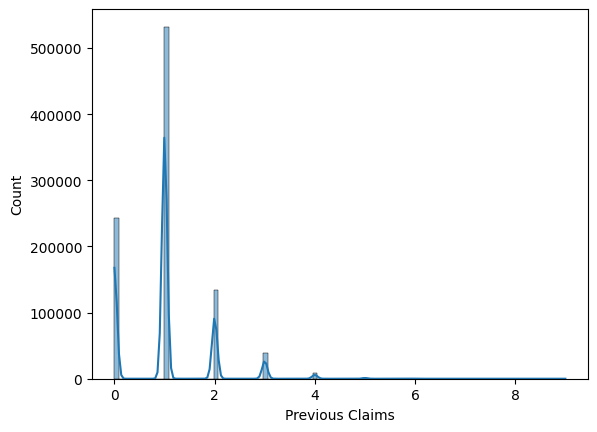

0


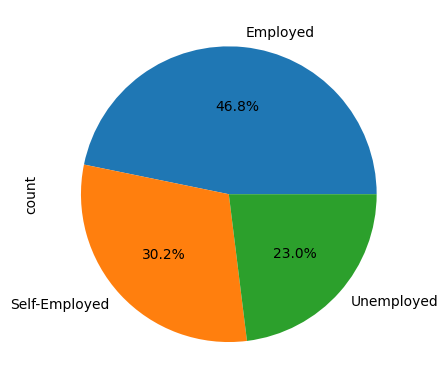

0


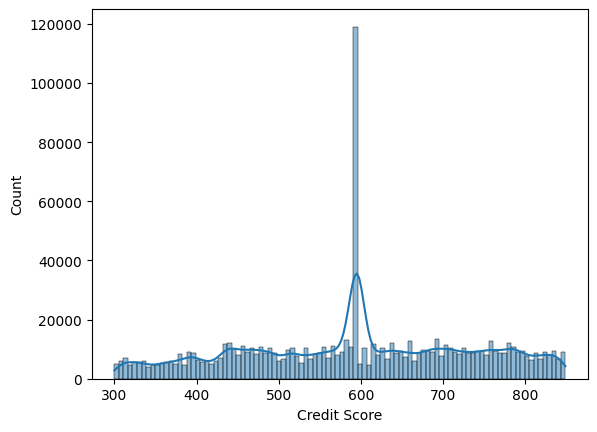

0


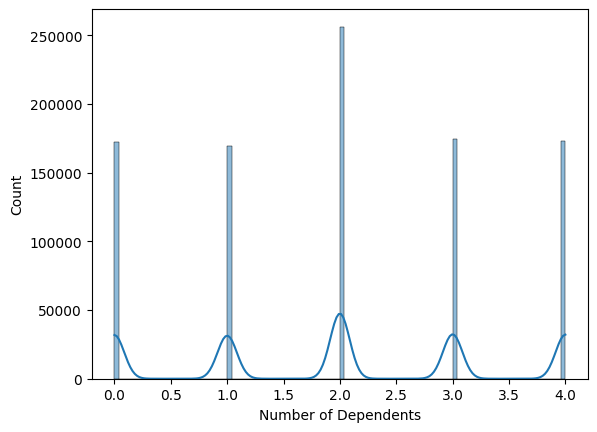

0


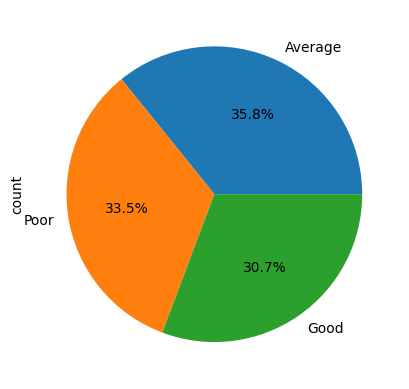

0


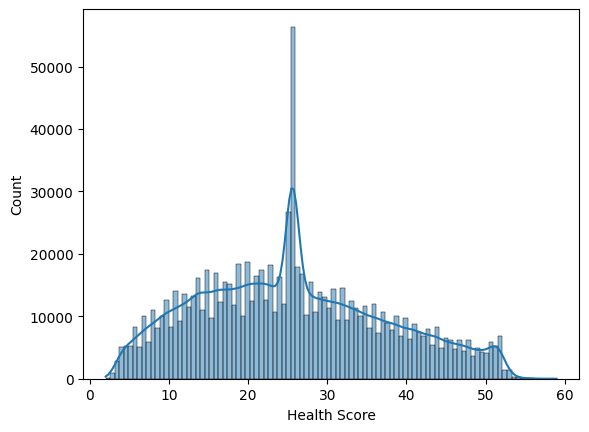

0


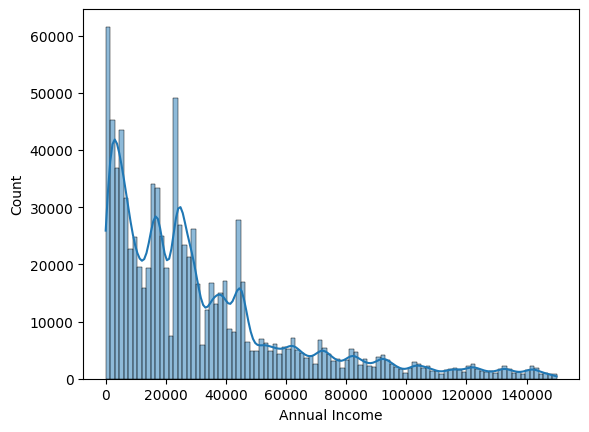

0


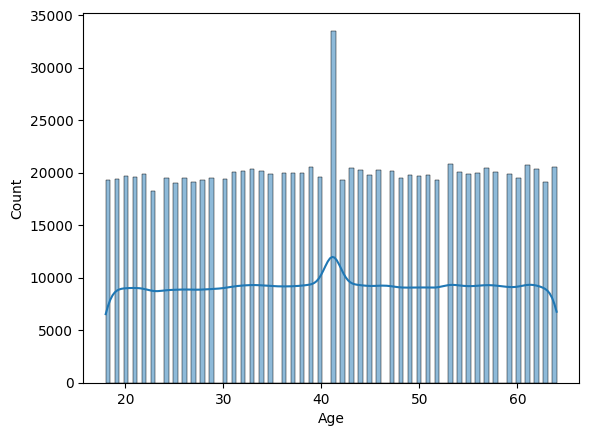

In [29]:
X_train,y_train= preprocessing(train_set)

0


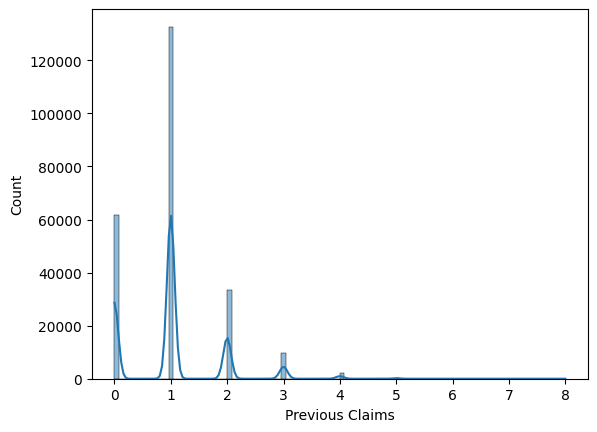

0


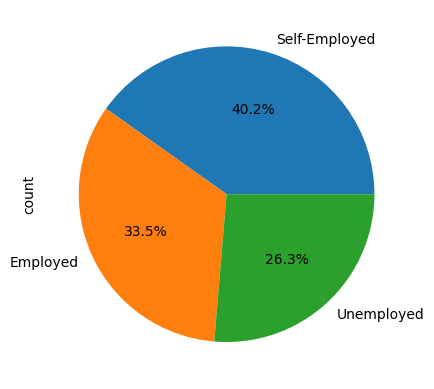

0


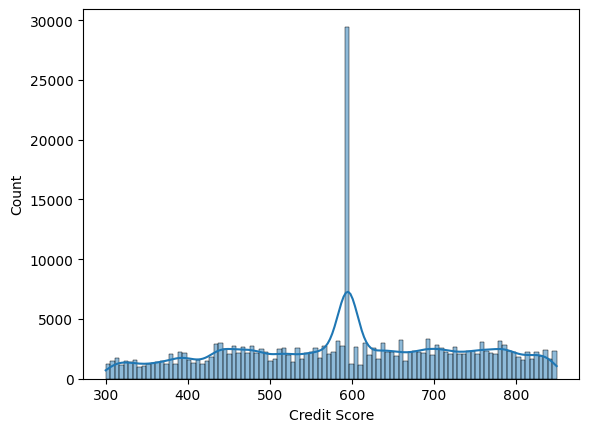

0


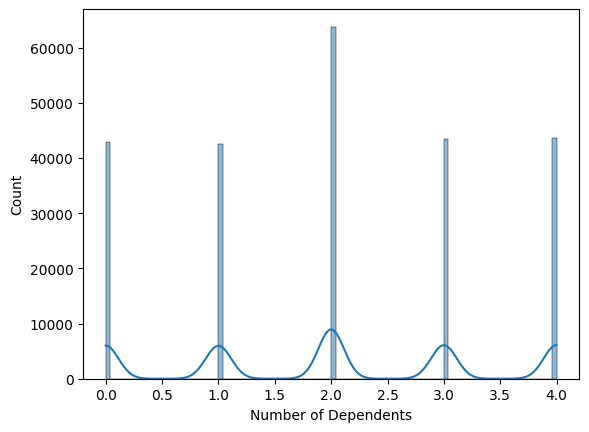

0


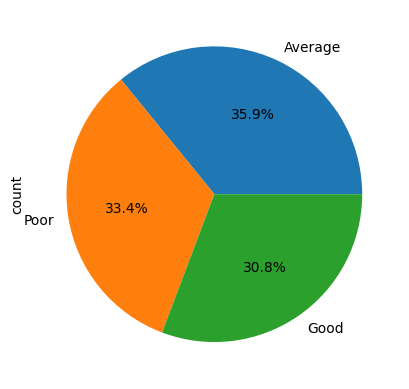

0


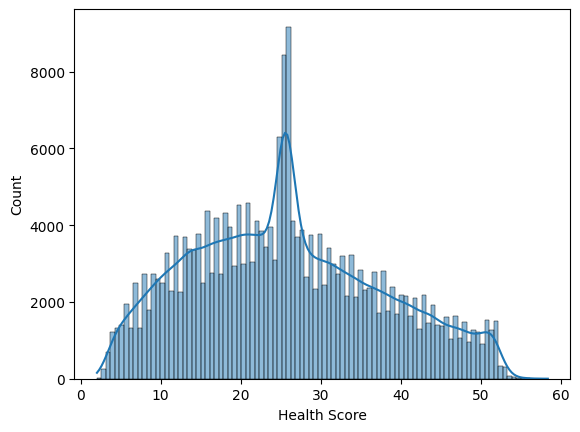

0


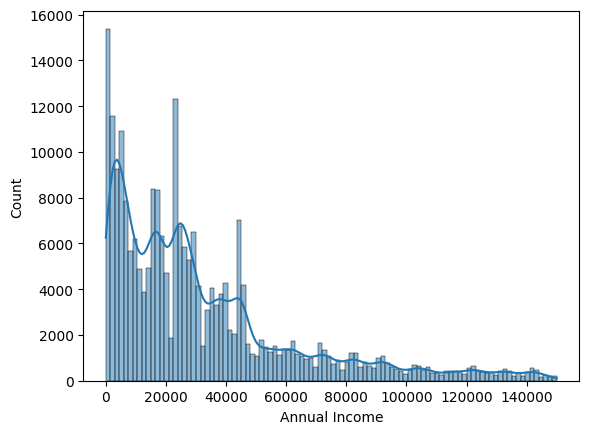

0


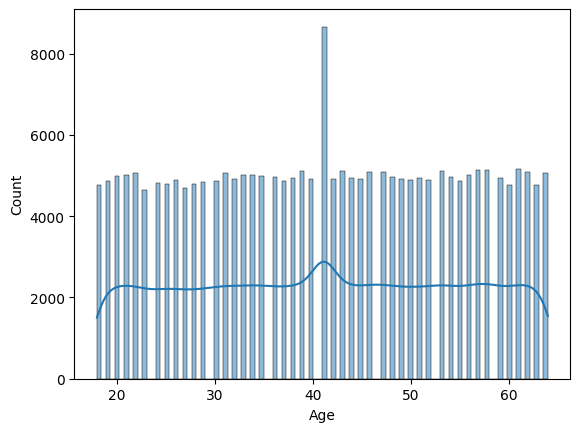

In [30]:
X_test,y_test = preprocessing(test_set)

In [31]:
df1_numerical.var(axis=0)

,0
Age,1.833302e+02
Annual Income,1.035521e+09
Number of Dependents,2.008846e+00
Health Score,1.489245e+02
Previous Claims,9.659748e-01
Vehicle Age,3.336436e+01
Credit Score,2.249458e+04
Insurance Duration,6.730555e+00
Premium Amount,7.482230e+05


In [32]:
#First model
from sklearn.tree import DecisionTreeRegressor # we are in overfitting with this model score = 1.52 without data imputation
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor # score = 1.1733494372585298 without data imputation, 1.1539799810346232 with data imputation
from sklearn.metrics import root_mean_squared_log_error,mean_absolute_error
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,RobustScaler
from sklearn.feature_selection import SelectKBest,RFECV
from xgboost import XGBRegressor

In [33]:
# model = make_pipeline(RobustScaler(),
#                       SelectKBest(k=10),
#                       RandomForestRegressor(n_estimators=100,random_state=0,max_depth=10))

In [34]:
#Evaluation process "rmsle"
def evaluation(model):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  y_pred = np.clip(y_pred, a_min=0.0001, a_max=None)
  rmsle = root_mean_squared_log_error(y_test,y_pred)
  return print(f'score{rmsle}')

In [35]:
# evaluation(model)

In [36]:
# pd.DataFrame(data=model.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,8))

In [37]:
# N, train_score, validation_score= learning_curve(
#     estimator=model,
#     X=X_train,
#     y=y_train,
#     train_sizes= np.linspace(0.1,1.0,10),
#     cv=5,
#     scoring='neg_mean_squared_log_error')
# print(N)
# # print(train_score)
# plt.figure()
# plt.plot(N, -train_score.mean(axis=1), label='train_score')
# plt.plot(N, -validation_score.mean(axis=1), label='validation score')
# plt.xlabel("Nombre d'exemples")
# plt.ylabel("Score")
# plt.legend()
# plt.show()

## III - Modeling

#### 1 - Training different models

In [38]:
# preprocessor = make_pipeline(RobustScaler(),
#                              SelectKBest(k=10))

In [39]:
# RandomForestRegressor_model = make_pipeline(preprocessor,
#                                             RandomForestRegressor(n_estimators=100,random_state=0,max_depth=10))
# AdaBoostRegressor_model = make_pipeline(preprocessor,
#                                         AdaBoostRegressor(n_estimators=100,random_state=0))
# GradientBoostingRegressor_model = make_pipeline(preprocessor,
#                                                 GradientBoostingRegressor(n_estimators=100,random_state=0,max_depth=10))
# XGBRegressor_model = make_pipeline(preprocessor,
#                                    XGBRegressor(n_estimators=100,random_state=0,max_depth=10))
# StackingRegressor_model = make_pipeline(preprocessor,
#                                         StackingRegressor(estimators=
#                                          [('RandomForestRegressor',RandomForestRegressor_model),
#                                           ('AdaBoostRegressor',AdaBoostRegressor_model),
#                                            ('GradientBoostingRegressor',GradientBoostingRegressor_model),
#                                             ('XGBRegressor',XGBRegressor_model)],
#                                                           final_estimator=RandomForestRegressor(n_estimators=100,random_state=0,max_depth=1)))

In [40]:
# dict_models = {
#     'RandomForestRegressor': RandomForestRegressor_model,
#     'AdaBoostRegressor':AdaBoostRegressor_model,
#     'GradientBoostingRegressor': GradientBoostingRegressor_model,
#     'XGBRegressor': XGBRegressor_model,
#     'StackingRegressor': StackingRegressor_model,
# }

In [41]:
# for name,model in dict_models.items():
#   print(name)
#   evaluation(model)

#### 2 - Optimisation

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest

In [43]:
preprocessor = make_pipeline(RobustScaler(), SelectKBest(k=10))

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor

In [45]:
pipeline_rf = make_pipeline(preprocessor,
                            RandomForestRegressor(n_estimators=100, random_state=0, max_depth=10))

pipeline_ada = make_pipeline(preprocessor,
                             AdaBoostRegressor(n_estimators=100, random_state=0))

pipeline_gb = make_pipeline(preprocessor,
                            GradientBoostingRegressor(n_estimators=100, random_state=0))

pipeline_xgb = make_pipeline(preprocessor,
                             XGBRegressor(n_estimators=100, random_state=0))

In [46]:
stacking_estimators = [
    ('rf', pipeline_rf),
    ('ada', pipeline_ada),
    ('gb', pipeline_gb),
    ('xgb', pipeline_xgb)
]

stacking_regressor = StackingRegressor(
    estimators=stacking_estimators,
    final_estimator=RandomForestRegressor(n_estimators=100, random_state=0, max_depth=10)
)

In [47]:

# param_grid = {
#     'final_estimator__n_estimators': [50, 100, 150],
#     'final_estimator__max_depth': [5, 10, 15]
# }

# grid_search = GridSearchCV(estimator=stacking_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_log_error', n_jobs=-1)

In [ ]:
evaluation(stacking_regressor)

# print("Meilleurs paramètres trouvés :", .best_params_)
# print("Meilleur score (MSE négatif) :", grid_search.best_score_)

# # Modèle optimisé
# best_model = grid_search.best_estimator_